# Assignment 3

**Situation:** This kind of model is useful for insurance companies to determine the yearly insurance premium for a person.
\
**Task:** Predict yearly medical bill from given attributtes.
\
**Dataset:** Medical Cost Personal Dataset
\
**Steps:**


1.   EDA
2.   Visualization
3.   Preparing dataset for training
4.   Create Linear Regression Model
5.   Train the model
6.   Make Prediction
7.   Plot training & testing error


## 1. Exploratory Data Analysis (EDA)
**1.1 Viewing the dataset**  
> a. Loading the dataset \
b. Viewing first 5 values \
c. Checking shape.



In [1]:
# Loading the dataset
import pandas as pd
df = pd.read_csv('insurance.csv')

# Viewing first 5 entries in dataset
df.head()

# Viewing last 5 entries in dataset
#df.tail()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
# Checking shape
# Number of rows and columns in dataset
print(df.shape)   ## Dataset contains 1338 observations, with 7 features each.

(1338, 7)


No. of rows: 1338\
No. of columns: 7\
One of the column is output values.
*   ***Hence the dataset contains 1338 samples, each with 6 features.***

\\
**1.2 Probing the dataset**
> a. Finding Missing Values \
b. Checking Data Types \
c. Checking Summary Statistics \
d. Finding outliers \

In [4]:
# Data type of columns in dataset, and if they contain null values of not
df.info()         ## No variable contains null/missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB



*   ***The dataset has no missing values.***
*   ***Data has both numerical and string values.***


\
Out of 6 features only 3 are numerical values. 3 features are stored in string format.\
For linear regression, the non-numberical features need to be converted to numerical ones.\
How to do that:
1.   Calculate how many unique entries are there in each such column.
2.   Then replace each value with an appropriate numerical value.



In [5]:
# To know statistics of each feature in dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


We see that for all the columns, the mean is more than median, hence the data is right skewed.

The difference between 75th percentile and max value is less.

*   ***This indicates there are not much 
outliers in our dataset.***






**1.3 Understanding the output variable**
> a. Checking unique values \
b. Finding skewness in output variables \


In [6]:
(df.charges.unique()).shape

(1337,)

 

*   **Most values in the charges column are unique.**

From the statistics, note that the mean is higher than the median. And there is large difference between 75th percentile and maximum.

*   **The distribution of output values is right skewed.**

In [7]:
import scipy as sc
import numpy as np

# Excess Kurtosis and Skew of normal distribution for comparison
nd = np.random.normal()
ndKurtosis = sc.stats.kurtosis(nd, fisher=False)
ndSkew = sc.stats.skew(nd)

print('Normal Distribution:',ndSkew,ndKurtosis,sep=":  ")

# Excess Kurtosis and Skew of normal distribution for comparison
valuesKurtosis = sc.stats.kurtosis(df['charges'],bias=True,fisher=False)
valuesSkew = sc.stats.skew(df['charges'])

print('Charges:',valuesSkew,valuesKurtosis,sep=":  ")

Normal Distribution::  nan:  nan
Charges::  1.5141797118745743:  4.595821363956751


C:\Users\Ashish\AppData\Local\Temp\ipykernel_17000\3515541511.py:6: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  ndKurtosis = sc.stats.kurtosis(nd, fisher=False)
C:\Users\Ashish\AppData\Local\Temp\ipykernel_17000\3515541511.py:7: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  ndSkew = sc.stats.skew(nd)


**Excess Kurtosis**: Gives a measure of tailedness relative to normal distribution, which measures how often outliers occur.

'charges' has a positive excess kurtosis, this means the distribution is leptokurtic, and outlier frequency is high.


**Skewness**: Measures the asymmetry of the distribution.

'charges' has a positive skewness, which means data is right skewed.

## 2. Data Visualization
**2.1 Visualizing the output variable**



C:\Users\Ashish\AppData\Local\Temp\ipykernel_17000\11246949.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'],color='orange',kde=True)


<Axes: xlabel='charges', ylabel='Density'>

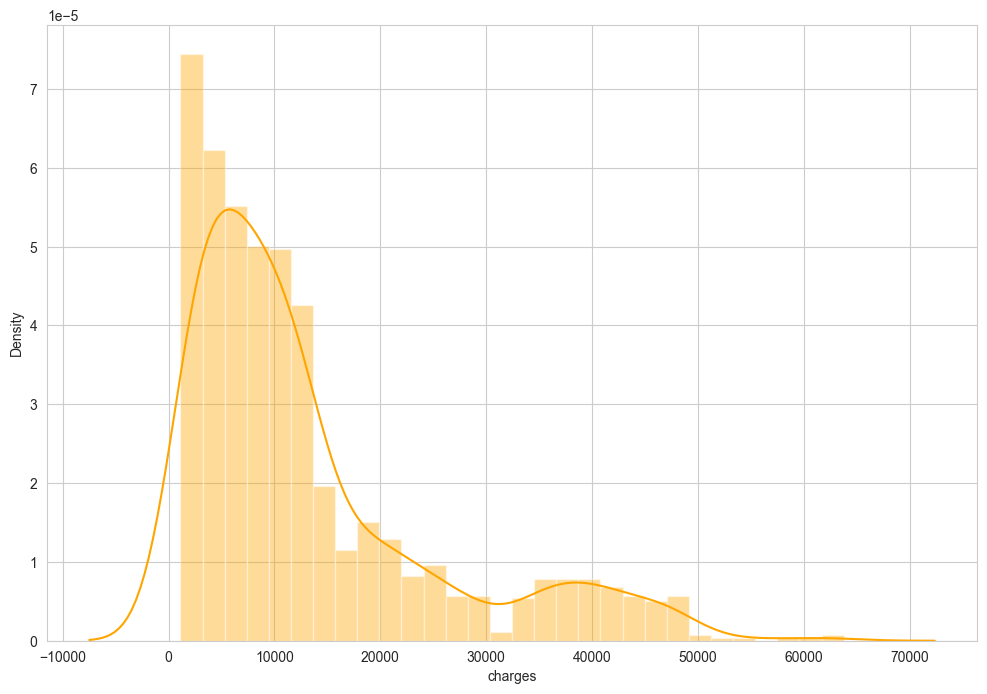

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

plt.figure(figsize=(12,8))
sns.distplot(df['charges'],color='orange',kde=True)

The distribution is infact right skewed, as predicted by the EDA.

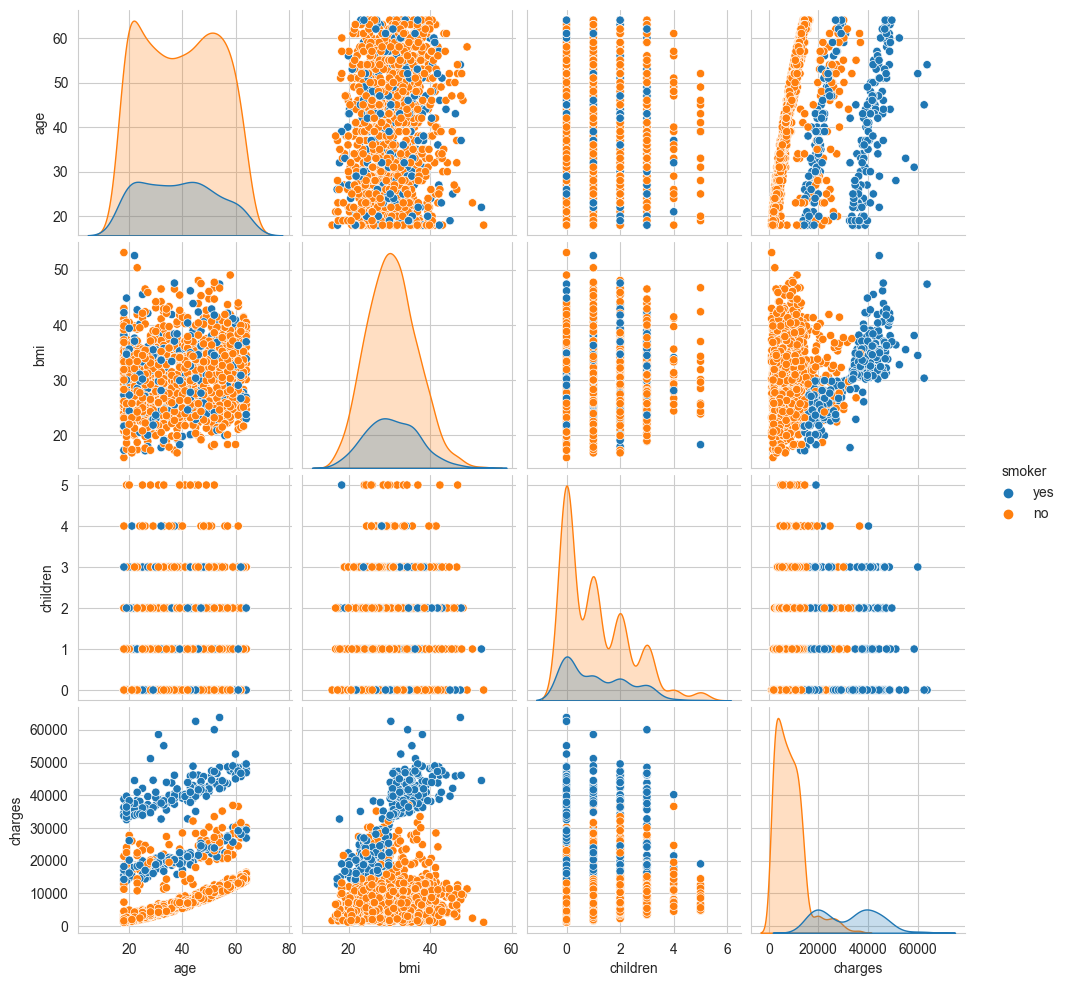

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid');
sns.pairplot(df, hue='smoker');
plt.show()

## 3. Preparing Dataset for Training

How to prepare the dataset?
1.   Transform the categorical values to numerical ones
2.   Split the data into training and test sets.

In [10]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [11]:
df['sex'] = df['sex'].map(
    {'female': 1, 
     'male': 0})

df['smoker'] = df['smoker'].map(
    {'yes': 1, 
     'no': 0 })

df['region'] = df['region'].map(
    {'southwest': 1, 
     'southeast': 2,
     'northwest': 3, 
     'northeast': 4})

df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3,10600.54830
1334,18,1,31.920,0,0,4,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,1,2007.94500


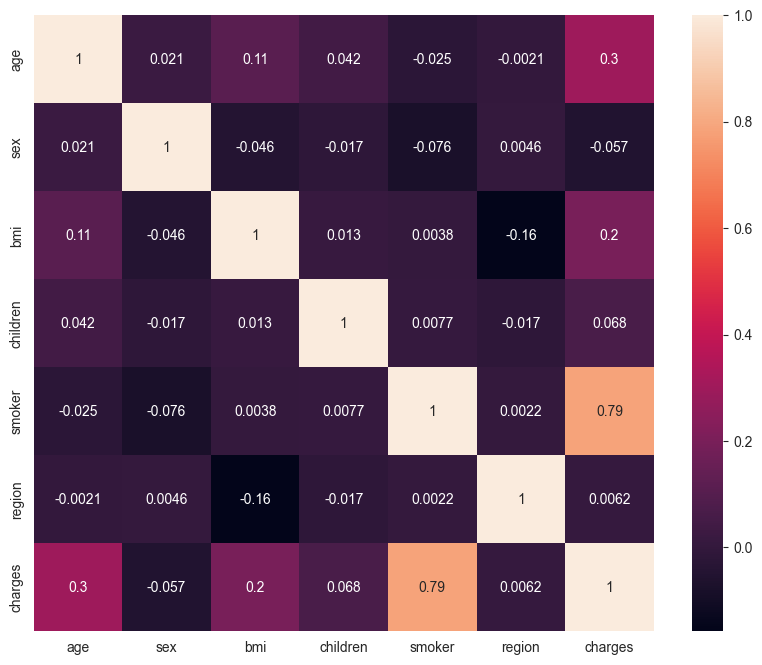

In [12]:
# Data correlation
import matplotlib.pylab as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

Age to Charges = 0.3 \
BMI to Charges = 0.2 \
Smoker to Charges = 0.79 

Thus Age, BMI and Smoker have a good correlation with Charges.

In [13]:
# Make new variable 
x = df[['age','bmi', 'smoker']]
y = df[['charges']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)
print(x.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1338, 3) (1338, 1)
(669, 3) (669, 1)
(669, 3) (669, 1)


## 4,5 Linear Regression


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'Accuracy: {r2_score(y_test, y_pred)}')

Accuracy: 0.7641938242430081


## 6. Prediction

In [15]:
# To check prediction
import numpy as np
tes_x = np.array([24,20.1,0]).reshape(1,3)
print(model.predict(tes_x)[0,0])

740.2506518242972


C:\Users\Ashish\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## 7. Plot

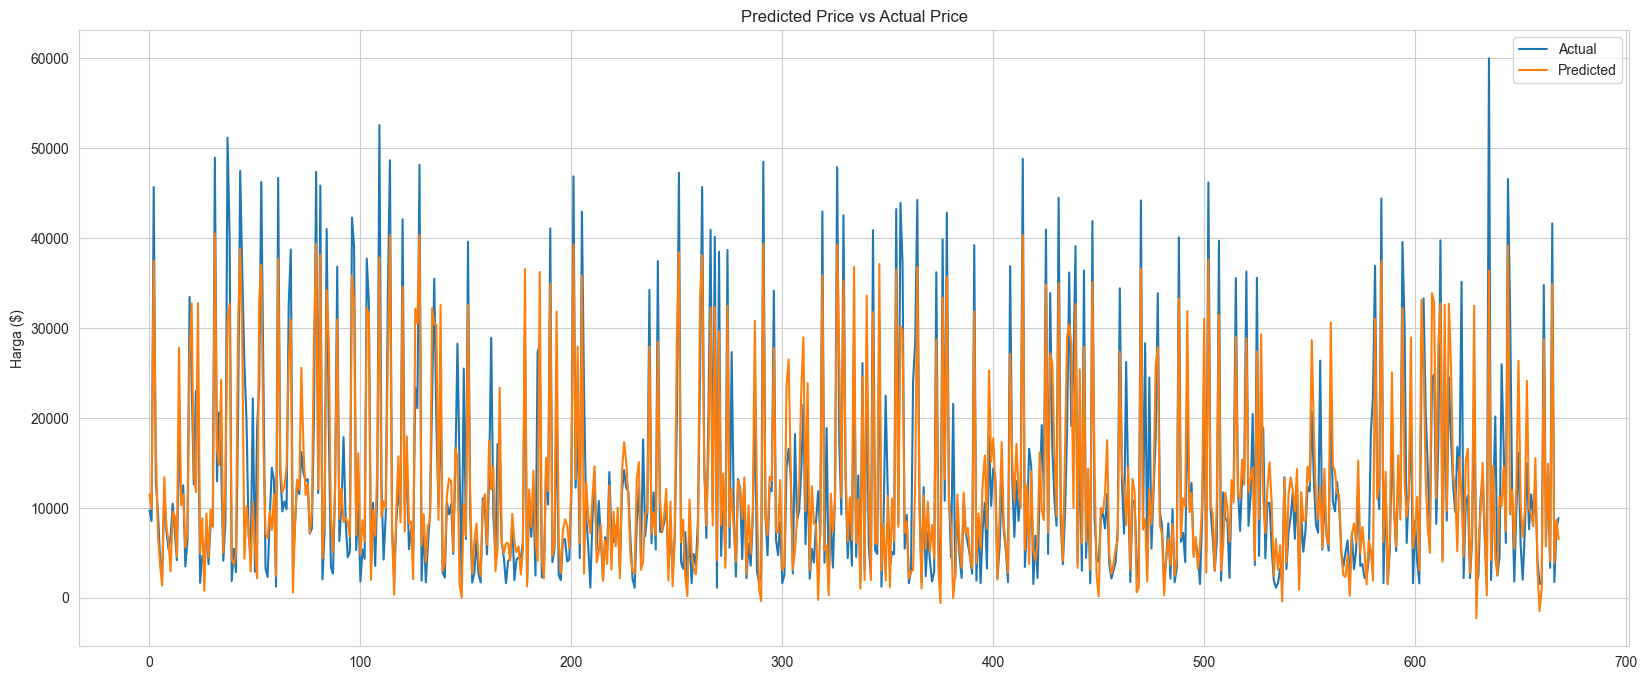

In [19]:
# Comparasion Between Real Insurance Price and Prediction Price
y_pred = model.predict(X_test)

plt.figure(figsize=(20,8))
plt.plot(np.arange(len(y_test)), y_test, label='Actual')
plt.plot(np.arange(len(y_test)), y_pred, label='Predicted')
plt.title('Predicted Price vs Actual Price')
plt.ylabel('Harga ($)')
plt.grid(True)
plt.legend()
plt.show()